In [586]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [587]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns


In [279]:
from google.colab import files
uploaded = files.upload()

Saving weeklycrct.xlsx to weeklycrct (2).xlsx


In [728]:
data = pd.read_excel ('weeklycrct.xlsx')


In [729]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      2
NOy1         2
NO2y1        2
NOxy1        2
NH3y1        2
SO2y1        2
Ozoney1      2
PM2.5y2      2
NOy2         2
NO2y2        2
NOxy2        2
NH3y2        2
SO2y2        2
Ozoney2      2
PM2.5y3      1
NOy3         1
NO2y3        1
NOxy3        1
NH3y3        1
SO2y3        1
Ozoney3      1
dtype: int64

In [730]:
data = data.fillna(data.median())


In [731]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      0
NOy1         0
NO2y1        0
NOxy1        0
NH3y1        0
SO2y1        0
Ozoney1      0
PM2.5y2      0
NOy2         0
NO2y2        0
NOxy2        0
NH3y2        0
SO2y2        0
Ozoney2      0
PM2.5y3      0
NOy3         0
NO2y3        0
NOxy3        0
NH3y3        0
SO2y3        0
Ozoney3      0
dtype: int64

In [732]:

data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [733]:
import datetime as dt

In [734]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [735]:
df=data.loc['0':'207']

In [736]:
df

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,2019,11,24
204,737394,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,2019,12,1
205,737401,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,2019,12,8
206,737408,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,2019,12,15


In [737]:
df.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [738]:
X1 = df[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]
Y1 = df['NH3']

In [739]:
X1

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,2019,11,24
204,737394,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,2019,12,1
205,737401,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,2019,12,8
206,737408,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,2019,12,15


In [740]:
Y1

0      28.141429
1      51.425238
2      21.401905
3      19.521779
4      30.172281
         ...    
203    15.740000
204    12.037143
205    19.447143
206    10.748571
207     8.620000
Name: NH3, Length: 208, dtype: float64

In [38]:
from google.colab import files
files.download('weeklycrct.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [741]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state= 36)


In [742]:
forest =  RandomForestRegressor(n_estimators=1500,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=7,random_state=20)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=7,
                      n_estimators=1500, random_state=20)

In [743]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9426445151618857

Score on test data: 0.8886896147219364

Root Mean Squared Error: 18.441103048704186

Overall model accuracy: 0.8886896147219364


In [834]:
#test=data.loc['207':'219']
#test=data.loc['220':'222']
#test=data.loc['223':'227']
#test=data.loc['228':'229']
test=data.loc['230':'256']
X=test[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]

In [835]:
predict=forest.predict(X)

In [836]:
predict

array([14.62961254, 14.83168833, 14.64240163, 12.99446785, 14.55326349,
       13.98139746, 10.96909027, 14.36069419, 14.63292983, 14.9395254 ,
       14.93550244, 24.28262819, 22.78976723, 56.22293367, 34.02587833,
       23.14446061, 23.46258804, 24.65752209, 23.07337719, 28.13663131,
       35.01419774, 37.7928732 , 37.95939977, 49.65136421, 44.16459343,
       27.20021716, 30.14948878])

In [837]:
#dates=data.loc['212':'219','From Date']
#dates=data.loc['220':'222','From Date']
#dates=data.loc['223':'227','From Date']
#dates=data.loc['228':'229','From Date']
dates=data.loc['230':'256','From Date']

In [838]:
X['From Date']= dates.values

In [839]:
X.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [840]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [841]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [842]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [843]:
X['pred']=predict

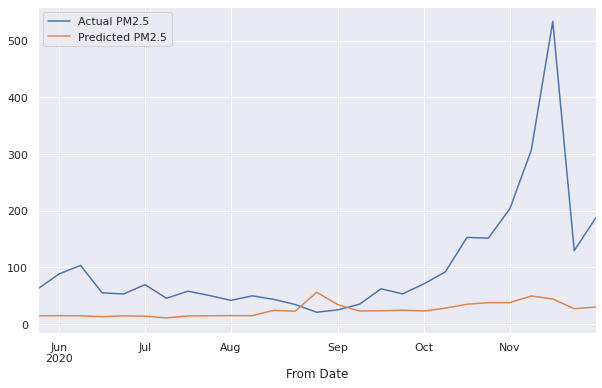

In [844]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [671]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

73.52148689247608

In [571]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3.2052628471827727
MSE: 33.100508821178835
RMSE: 5.75330416553643
R-Squared: 0.9850643505919839


In [572]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 63.93937260082474
MSE: 12729.767215261818
RMSE: 112.82627005827064
R-Squared: -0.1312138165813741


# 3rd plot

In [845]:
testcase = pd.DataFrame()

In [846]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [847]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [848]:
testcase

,test,pred,Corrected
167,24.454286,24.455265,18.701961
56,107.420000,134.827548,129.074244
188,4.795714,7.100116,1.346812
48,248.184286,149.766691,155.519995
92,17.551429,17.221433,22.974737
2,21.401905,21.170950,26.924254
14,28.244211,28.147020,33.900325
126,132.404286,149.447565,143.694261
104,68.041429,70.436321,64.683016
28,25.544912,25.337298,31.090602


In [849]:
"""testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')"""

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [850]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8763087553237418

In [851]:
test2020=pd.DataFrame()

In [852]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [853]:
test2020.index=test.index

In [854]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

In [855]:
test2020

,test,pred,Corrected
From Date,,,
2020-05-31,14.788571,14.629613,20.382917
2020-06-07,16.155714,14.831688,20.584992
2020-06-14,14.667143,14.642402,20.395706
2020-06-21,12.945714,12.994468,7.241164
2020-06-28,14.657143,14.553263,20.306568
2020-07-05,13.644286,13.981397,8.228093
2020-07-12,11.955714,10.969090,16.722394
2020-07-19,14.170000,14.360694,8.607390
2020-07-26,14.897143,14.632930,20.386234


In [856]:
test2020["Corrected"].describe()

count    27.000000
mean     26.999194
std      13.183089
min       7.241164
25%      20.344742
50%      21.446913
75%      32.150381
max      61.976238
Name: Corrected, dtype: float64

In [275]:
test2020["Corrected"].min()

17.791416020923368

In [276]:
test2020["Corrected"].max()

268.68336964492545

In [115]:
test2020["Corrected"].mean()

136.54028529672857

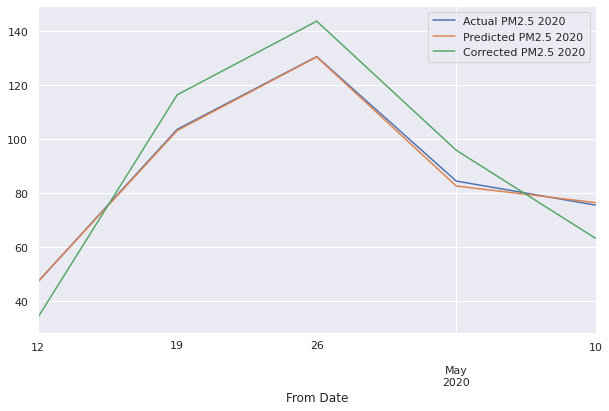

In [216]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [109]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.9209768140970864

In [111]:
test2020[corrected].median() 

NameError: ignored